##### Data の概要
この Data は、EC mall の Tmall の閲覧履歴。
- 期間: 2015年07月01日 ~ 2015年07月08日までの８日間の Data.
- User数: 約３万人
- 期間内に閲覧された商品数: 約９万点
- User あたりの閲覧数: おおよそ５回
- 商品あたりの閲覧数: おおよそ２回

In [2]:
import pandas as pd

log_df = pd.read_csv('access_log.csv', parse_dates=['date'])
print(log_df.shape)
log_df.head()

(325908, 3)


,user_id,item_id,date
0,4,205587,2015-07-04
1,4,748683,2015-07-04
2,4,790055,2015-07-04
3,4,790055,2015-07-04
4,4,764638,2015-07-04


Column:
- User_id: User の Unique ID で、正の整数値をとる
- item_id: 商品の Unique ID で、正の整数値をとる
- date: User が商品を閲覧した日付。yyyy-mm-dd の形式をとる。

In [3]:
# User が期間内でどのくらい商品を閲覧を知るために User の商品の閲覧数の分布を確認
log_df['user_id'].value_counts().describe()

count    31443.000000
mean        10.365042
std         16.023399
min          2.000000
25%          3.000000
50%          5.000000
75%         11.000000
max        632.000000
Name: user_id, dtype: float64

<AxesSubplot:>

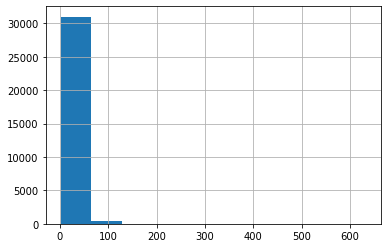

In [4]:
log_df['user_id'].value_counts().hist()

- count から Unique user 数
- mean から平均閲覧数
- 50% から商品閲覧数の中央値

が確認とれる。
最大で 632 回商品を閲覧している Heavy user もいるため、平均値と中央値に大きなズレが生じている。

In [5]:
# 商品が期間内でどのくらい User に閲覧されているかを知るために、商品を閲覧した User 数の分布を確認
log_df['item_id'].value_counts().describe()

count    87611.000000
mean         3.719944
std          8.802572
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        941.000000
Name: item_id, dtype: float64

<AxesSubplot:>

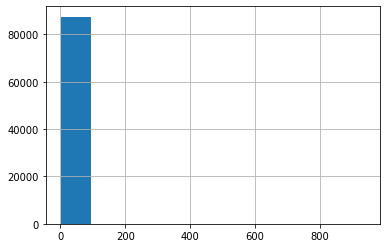

In [6]:
log_df['item_id'].value_counts().hist()

- count から商品数
- mean から１商品あたりの閲覧数の平均
- 50% から１商品あたりの閲覧数の中央値

が確認とれる。
最大で 941 回、閲覧されている人気商品があることが確認とれる。

In [7]:
# 閲覧履歴の期間とその商品閲覧数のばらつきを確認
log_df['date'].value_counts()

2015-07-03    45441
2015-07-02    45394
2015-07-01    44163
2015-07-04    43804
2015-07-08    39933
2015-07-05    39932
2015-07-07    33930
2015-07-06    33311
Name: date, dtype: int64

<AxesSubplot:>

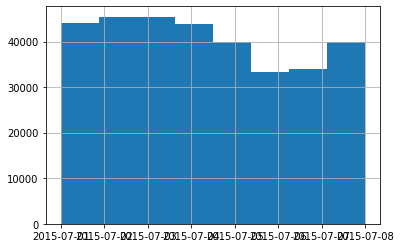

In [8]:
log_df['date'].hist(bins=8)

#### Data の性質
- Recency に関する単調性: User は最近閲覧した商品ほど興味がある。
- Frequency に関する単調性: User は何度も閲覧した商品ほど興味がある。

取り扱う Data に上記の仮説が成り立つか確認する。

User の再閲覧確率を求めるために、2015年07月01日 ~ 2015年07月07日までの閲覧履歴をもとに07月08日に再閲覧する確率を集計して求める。

2015年07月01日から07月07日までの閲覧履歴の Data と07月08日に閲覧された商品の Data を分離

In [9]:
import datetime

start_date = datetime.datetime(2015, 7, 1)
end_date = datetime.datetime(2015, 7, 7)
target_date = datetime.datetime(2015, 7, 8)

In [10]:
# 2015年07月01日から07月07日までの閲覧履歴 Data を抽出
x_df = log_df[
    (start_date <= log_df['date'])
    & (log_df['date'] <= end_date)
    ]
print(x_df.shape)
x_df.head(3)

(285975, 3)


,user_id,item_id,date
0,4,205587,2015-07-04
1,4,748683,2015-07-04
2,4,790055,2015-07-04


In [11]:
# 07月08日の閲覧履歴 Data を抽出
y_df = log_df[log_df['date'] == target_date]
print(y_df.shape)
y_df.head()

(39933, 3)


,user_id,item_id,date
103,94,603852,2015-07-08
104,94,28600,2015-07-08
105,94,987320,2015-07-08
106,94,109924,2015-07-08
107,94,886214,2015-07-08


In [12]:
# x_df から User が閲覧した商品に対して freq(頻度) と rcan(最新度) を算出
U2IRcens = {}
for row in x_df.itertuples():
    # 最新度（経過日数）の算出: 基準日 - 最終閲覧日
    rcen = (target_date - row.date).days

    # 辞書に最新度を登録
    U2IRcens.setdefault(row.user_id, {})
    U2IRcens[row.user_id].setdefault(row.item_id, [])
    U2IRcens[row.user_id][row.item_id].append(rcen)

In [13]:
U2IRcens[2497]

{400521: [4, 2, 2, 2, 1], 678277: [4], 687963: [2], 178138: [1]}

User_id: 2497　の商品閲覧状況は、
- item_id: 400521 => 4日前に１回、2日前に３回、1日前に１回、閲覧。
- item_id: 678277 => 4日前に１回、閲覧。
- item_id: 687963 => 2日前に１回、閲覧。
- item_id: 178138 => 1日前に１回、閲覧。

言い換えると
- item_id: 400521 => 閲覧数５回、直近１日前に閲覧された。
- item_id: 678277 => 閲覧数１回、直近で４日前に閲覧された。
- item_id: 687963 => 閲覧数１回、直近で２日前に閲覧された。
- item_id: 178138 => 閲覧数１回、直近で１日前に閲覧された。

In [14]:
# freq（頻度）とrcen（最新度）を追加した Data を作成
Rowsl = []
for user_id, I2Rcens in U2IRcens.items():
    for item_id, Rcens in I2Rcens.items():
        freq = len(Rcens)
        rcen = min(Rcens)
        Rowsl.append((user_id, item_id, rcen, freq))

UI2RF_df = pd.DataFrame(Rowsl, columns=['user_id', 'item_id', 'rcen', 'freq'])
print(UI2RF_df.shape)
UI2RF_df.head()


(204661, 4)


,user_id,item_id,rcen,freq
0,4,205587,4,1
1,4,748683,4,1
2,4,790055,4,3
3,4,764638,4,2
4,4,492434,4,1


In [15]:
# 7月8日の Data `y_df` の重複を取り除き、pv_flag の Column を追加する
y_df = y_df.drop_duplicates()
print(y_df.shape)
y_df['pv_flag'] = 1
y_df

(29651, 3)


,user_id,item_id,date,pv_flag
103,94,603852,2015-07-08,1
104,94,28600,2015-07-08,1
105,94,987320,2015-07-08,1
106,94,109924,2015-07-08,1
107,94,886214,2015-07-08,1
...,...,...,...,...
325676,423919,707537,2015-07-08,1
325679,423919,692138,2015-07-08,1
325682,423919,617597,2015-07-08,1
325715,423958,963019,2015-07-08,1


In [16]:
# UI2FR_df に user_id と item_id を key として y_df を merge
UI2RFP_df = pd.merge(UI2RF_df, y_df[['user_id', 'item_id', 'pv_flag']], how='left', on=['user_id', 'item_id'])
UI2RFP_df['pv_flag'].fillna(0, inplace=True)
print(UI2RFP_df.shape)
UI2RFP_df.head()

(204661, 5)


,user_id,item_id,rcen,freq,pv_flag
0,4,205587,4,1,0.0
1,4,748683,4,1,0.0
2,4,790055,4,3,0.0
3,4,764638,4,2,0.0
4,4,492434,4,1,0.0


In [17]:
# rcen と freq がどのような値をとるか確認
print(sorted(UI2RFP_df['rcen'].unique()))
print(sorted(UI2RFP_df['freq'].unique()))

[1, 2, 3, 4, 5, 6, 7]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 31, 32, 34, 35, 41, 43, 58, 63, 118]


rcen: 定義域が 1 ~ 7 (※閲覧履歴が7月1日から7月7日までの期間で切れているため)
freq: 期間中何度でも商品を閲覧できるので最大値が 118 になっている。

In [18]:
# 今回は、わかりやすさのため freq の定義域を rcen との規模感に合わせ、7以下となるように Filtering し、目標となる Data を `tar_df` を作成
tar_df = UI2RFP_df[UI2RFP_df['freq'] <= 7]
print(tar_df.shape)
tar_df.head()

(203456, 5)


,user_id,item_id,rcen,freq,pv_flag
0,4,205587,4,1,0.0
1,4,748683,4,1,0.0
2,4,790055,4,3,0.0
3,4,764638,4,2,0.0
4,4,492434,4,1,0.0


In [19]:
# pv_flag の規模感を確認
print(tar_df['pv_flag'].sum())

2038.0


7月1日から7月7日までの期間に閲覧された商品のなかで、7月8日に再閲覧された商品は 2,038件ある様子

In [20]:
# Data が Recency と Frequency の単調性をもつことを確認

# rcen に対して、7月8日に閲覧したか (pos)、閲覧しなかったか (neg) について Cross集計
rcen_df = pd.crosstab(index=tar_df['rcen'], columns=tar_df['pv_flag'])
rcen_df = rcen_df.rename(columns= {0: 'neg', 1: 'pos'})
rcen_df

pv_flag,neg,pos
rcen,,
1,24595,571
2,24032,274
3,28212,326
4,30641,275
5,31510,225
6,31721,199
7,30707,168


pv_flag,neg,pos,N,prob
rcen,,,,
1,24595,571,25166,0.022689
2,24032,274,24306,0.011273
3,28212,326,28538,0.011423
4,30641,275,30916,0.008895
5,31510,225,31735,0.007090
6,31721,199,31920,0.006234
7,30707,168,30875,0.005441


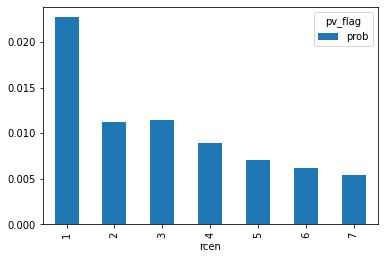

In [21]:
# 各rcen に対して総件数を N として、再閲覧率 prob を算出
rcen_df['N'] = rcen_df['neg'] + rcen_df['pos']
rcen_df['prob'] = rcen_df['pos'] / rcen_df['N']
rcen_df[['prob']].plot.bar()
rcen_df

- rcen に対して再閲覧率 prob が単調減少の傾向がある

=> 最近で閲覧した商品ほど再度閲覧されると解釈できる。

In [22]:
# freq に対して、7月8日に閲覧したか (pos), 閲覧しなかったか (neg) について Cross集計
freq_df = pd.crosstab(index=tar_df['freq'], columns=tar_df['pv_flag'])
freq_df = freq_df.rename(columns={0: 'neg', 1: 'pos'})
freq_df

pv_flag,neg,pos
freq,,
1,161753,964
2,24938,476
3,7733,258
4,3527,149
5,1807,88
6,1038,63
7,622,40


pv_flag,neg,pos,N,prob
freq,,,,
1,161753,964,162717,0.005924
2,24938,476,25414,0.018730
3,7733,258,7991,0.032286
4,3527,149,3676,0.040533
5,1807,88,1895,0.046438
6,1038,63,1101,0.057221
7,622,40,662,0.060423


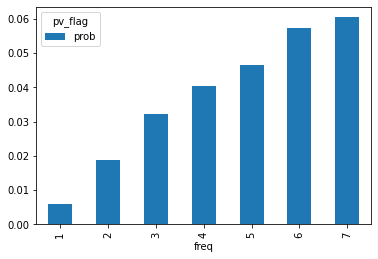

In [23]:
# 各 freq に対して総件数を N として、再閲覧率 prob を算出
freq_df['N'] = freq_df['neg'] + freq_df['pos']
freq_df['prob'] = freq_df['pos'] / freq_df['N']
freq_df[['prob']].plot.bar()
freq_df

- freq に対して prob が単調増加の傾向

=> 何度も閲覧した商品ほど再度閲覧される、と解釈できる

対象とする Data において、Recency と Frequency の単調性が成立すると判断できる。

## 数理 Modeling と 実装
rcen と freq に対して再度閲覧確率を対応付ける関数を数理 Model として構築する。

### 数理 Model
rcen と freq に対する再閲覧確率 prob の関係を集計する。

次の Column を持つ rf_df を作成する。
- rcen: rcen の値
- freq: freq の値
- N: rcen と freq の Pair に対する総件数
- pv: rcen と freq の Pair に対する再閲覧の件数
- prob: rcen と freq の Pair に対する再閲覧確率

In [24]:
print(tar_df.shape)
tar_df.head()

(203456, 5)


,user_id,item_id,rcen,freq,pv_flag
0,4,205587,4,1,0.0
1,4,748683,4,1,0.0
2,4,790055,4,3,0.0
3,4,764638,4,2,0.0
4,4,492434,4,1,0.0


tar_df から３つの辞書を作成する。
- RF2N: rcen, freq の Pair を指定すると該当する総件数を表す辞書。
- RF2PV: rcen, freq の Pair を指定すると該当する再閲覧の件数を表す辞書。
- RF2Prob: rcen, freq の Pair を指定すると該当する再閲覧確率を表す辞書。

In [25]:
# tar_df から RF2PV を作成
RF2N = {}
RF2PV = {}
for row in tar_df.itertuples():
    RF2N.setdefault((row.rcen, row.freq), 0)
    RF2PV.setdefault((row.rcen, row.freq), 0)
    RF2N[row.rcen, row.freq] += 1
    if row.pv_flag == 1:
        RF2PV[row.rcen, row.freq] += 1

In [26]:
# 辞書 RF2N と辞書 RF2PV から 辞書 RF2Prob を作成
RF2Prob = {}
for rf, N in RF2N.items():
    RF2Prob[rf] = RF2PV[rf] / N

In [27]:
# rf_df を作成
Row3 = []
for rf, N in sorted(RF2N.items()):
    pv = RF2PV[rf]
    prob = RF2Prob[rf]
    row = (rf[0], rf[1], N, pv, prob)
    Row3.append(row)
rf_df = pd.DataFrame(Row3, columns=['rcen', 'freq', 'N', 'pv', 'prob'])
print(rf_df.shape)
rf_df.head()

(49, 5)


,rcen,freq,N,pv,prob
0,1,1,19602,245,0.012499
1,1,2,3323,132,0.039723
2,1,3,1120,81,0.072321
3,1,4,539,36,0.066790
4,1,5,285,36,0.126316


In [28]:
# rf_df を横持ちの Data 形式にする
rf_df.pivot_table(index='rcen', columns='freq', values='prob')

freq,1,2,3,4,5,6,7
rcen,,,,,,,
1,0.012499,0.039723,0.072321,0.066790,0.126316,0.112994,0.175000
2,0.005856,0.021189,0.026973,0.056645,0.066225,0.098765,0.063830
3,0.006107,0.023230,0.039621,0.053265,0.039427,0.054054,0.050420
4,0.005454,0.015366,0.024521,0.046901,0.036667,0.037838,0.018349
5,0.004376,0.015504,0.023673,0.014925,0.021898,0.028902,0.030612
6,0.004456,0.009848,0.024514,0.019569,0.008511,0.024793,0.025316
7,0.004256,0.009086,0.014056,0.023377,0.009091,0.020408,0.000000


In [29]:
# 3D の Graph を作成するために、いくつかの Library を import する
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

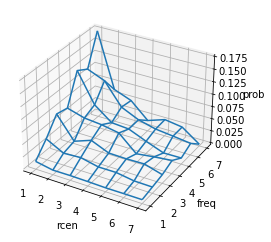

In [30]:
# rcen と freq に対する Prob の 3D Graph を描画
Freq = rf_df['freq'].unique().tolist()
Rcen = rf_df['rcen'].unique().tolist()
Z = [rf_df[(rf_df['freq'] == freq) & (rf_df['rcen'] == rcen)]['prob'].iloc[0] for freq in Freq for rcen in Rcen]
Z = np.array(Z).reshape((len(Freq), len(Rcen)))
X, Y = np.meshgrid(Rcen, Freq)
fig = plt.figure()
ax = fig.add_subplot(111,
                     projection='3d',
                     xlabel='rcen',
                     ylabel='freq',
                     zlabel='prob'
                     )
ax.plot_wireframe(X, Y, Z)

rcen, freq に対する prob の関係として Recency と Frequency の単調性の傾向があるものの、ところどころ成り立っていない様子がある。
原因として
- Data 量が少ないため
- Data に Noise が含まれるため

今回、作成した rf_df は、rcen と freq に対して Prob を対応づける関数となっている為、今回、目標とている数理 Model の１つとなる。

### 数理最適化 Model
Frequency と Recency の特性が成り立つような関数を構築するために、数理最適化 Model を構築する。

#### 確率推定問題
- 確率の推定
要件(1). rcen と freq に対して再閲覧確率 pred_prob を推定する
- Recency: User は最近閲覧した商品に興味がある
要件(2). pred_prob は rcen について単調減少する
- Frequency: User は何度も閲覧した商品に興味がある
要件(3). pred_prob は freq について単調減少する
- 推定した再閲覧確率と再閲覧確率の実績値との乖離を最小化する
要件(4). pred_prob と prob の二乗誤差を総件数の重み付きで最小化する

上記で定義する数理 Model を凸二次計画問題に Modeling する。
> ###### 凸二次計画
> 目的関数が凸な二次関数であり制約式が線形の不等式で書ける最適化問題

##### 要件(1). rcen と freq に対して再閲覧率 pred_prob を推定する
- rcen の範囲の List: *R*（自然数全体）
- freq の範囲の List: *F*（自然数全体）
- 変数（rcen *r(∊R)* と freq *f(∊F)* に対応する再閲覧確率の推定値）: *pred_prob_r,f∊\[0,1] (r∊R, f∊F)*

In [31]:
R = sorted(tar_df['rcen'].unique().tolist())
F = sorted(tar_df['freq'].unique().tolist())
print(R)
print(F)

[1, 2, 3, 4, 5, 6, 7]
[1, 2, 3, 4, 5, 6, 7]


In [32]:
# 変数の順番づけをする Idx(list) と、r(rcen) と freq(f) の値に対して索引 idx を対応づける辞書 RF2Idx を定義
# ※CVXOPT 変数 Vector と積をとる行列や Vector を直接定義するため、変数を明示的に定義する必要なし。その代わり、数理 Model いおける変数 pred_prob_r,f が何番目の変数か索引をつける必要がある。
Idx = []
RF2Idx = {}
idx = 0
for r in R:
    for f in F:
        Idx.append(idx)
        RF2Idx[r, f] = idx
        idx += 1
print(Idx)
print(RF2Idx)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
{(1, 1): 0, (1, 2): 1, (1, 3): 2, (1, 4): 3, (1, 5): 4, (1, 6): 5, (1, 7): 6, (2, 1): 7, (2, 2): 8, (2, 3): 9, (2, 4): 10, (2, 5): 11, (2, 6): 12, (2, 7): 13, (3, 1): 14, (3, 2): 15, (3, 3): 16, (3, 4): 17, (3, 5): 18, (3, 6): 19, (3, 7): 20, (4, 1): 21, (4, 2): 22, (4, 3): 23, (4, 4): 24, (4, 5): 25, (4, 6): 26, (4, 7): 27, (5, 1): 28, (5, 2): 29, (5, 3): 30, (5, 4): 31, (5, 5): 32, (5, 6): 33, (5, 7): 34, (6, 1): 35, (6, 2): 36, (6, 3): 37, (6, 4): 38, (6, 5): 39, (6, 6): 40, (6, 7): 41, (7, 1): 42, (7, 2): 43, (7, 3): 44, (7, 4): 45, (7, 5): 46, (7, 6): 47, (7, 7): 48}


In [33]:
# pred_prob の値域を制約式として定義する
G_list = []  # 制約式に現われる変数の係数行列を作るための List
h_list = []  # 制約式に現われる定数項の Vector を作るための List
var_vec = [0.0] * len(Idx)  # 変数の係数行列を作成するための Default の変数の係数 Vector

In [34]:
# 数理 Model の実装
# -pred_prob[r,f] <= 0 の実装
for r in R:
    for f in F:
        idx = RF2Idx[r, f]
        G_row = var_vec[:]
        G_row[idx] = -1  # pred_prob[r, f] の係数は -1
        G_list.append(G_row)
        h_list.append(0)  # 右辺は定数項 0

# pred_prob[r, f] <= 1 の実装
for r in R:
    for f in F:
        idx = RF2Idx[r, f]
        G_row = var_vec[:]
        G_row[idx] = 1  # pred_prob[r, f]の係数は 1
        G_list.append(G_row)
        h_list.append(1)  # 右辺の定数項は 1